How a color image is represented as np array?
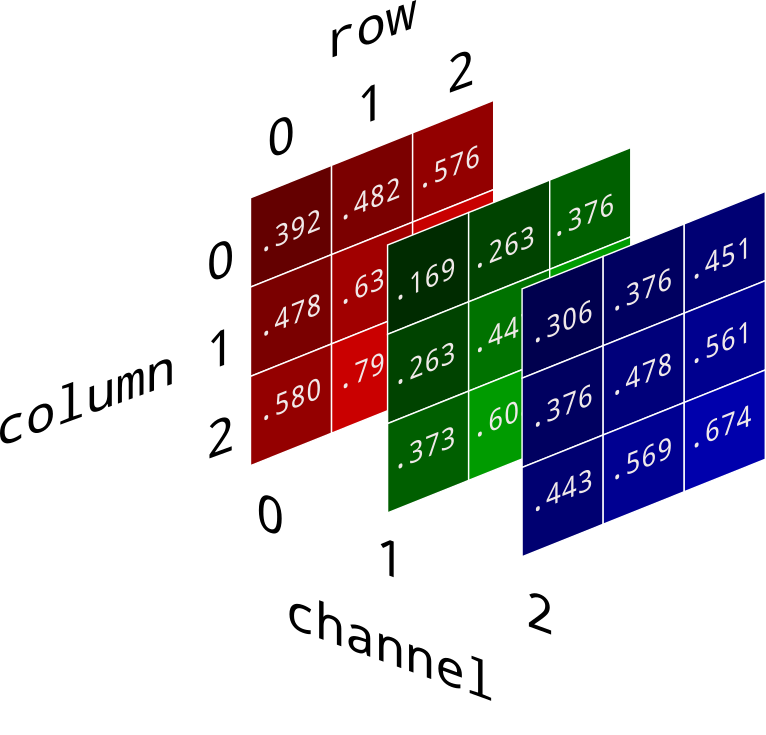

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


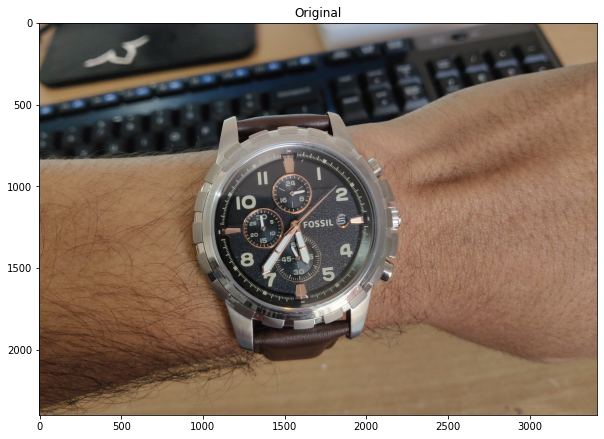

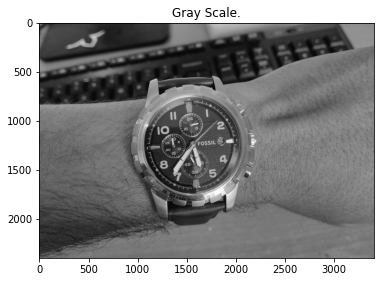

In [5]:
# add google drive path so that we can use images uploaded in drive
import os
from google.colab import drive
drive.mount("/content/drive")
data_dir = '/content/drive/My Drive/'

import numpy as np;
import matplotlib as plt;

#Load image
original = imread(f'{data_dir}Robert Cross 5.jpg')

fig = figure(1, (10,10)) # this is like a canvas upon which the image is drawn.
imshow(original);
title("Original");

#scale image between 0 and 1
og_scaled = original/255


def convert_to_grayscale(original):
  #taking mean for the color gradient axis will result in gray scale image.
  return np.mean(original, axis = 2)
  
# gray scaling helps in less calculation as there wont be 3 color gradients. 
gray_scale = convert_to_grayscale(og_scaled)

fig = figure(0, (6,6))
imshow(gray_scale, cmap = 'gray');
title("Gray Scale.");


x = gray_scale



In [2]:
def roberts_cross(x):
    '''Compute Robert's Cross of input image x.
       Args: x (nxm) grayscale floating point image
       Returns: (n-1) x (m-1) edge image.'''
    
    #Our output will image will be one pixel smaller than our image
    edges = np.zeros((x.shape[0]-1,x.shape[1]-1)) 

    for i in range(x.shape[0]-1):
        for j in range(x.shape[1]-1):
            #Grab Appropriate (2x2) image patch
            image_patch = x[i:i+2, j:j+2]
            # Compute Robert's Cross for image patch
            edges[i, j] = np.sqrt((image_patch[0,0] - image_patch[1, 1])**2 + 
                                   (image_patch[1, 0] - image_patch[0, 1])**2)
            
    return edges

edges = roberts_cross(x)


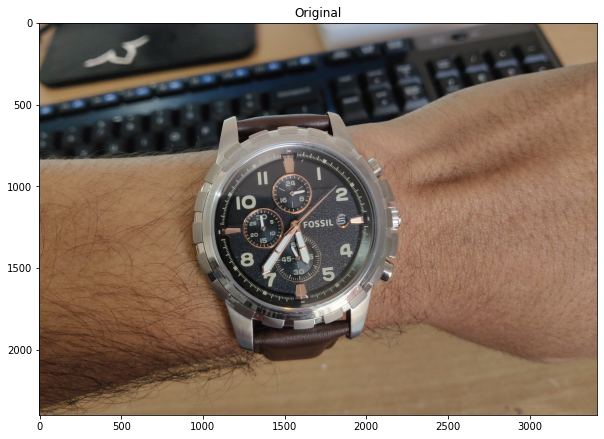

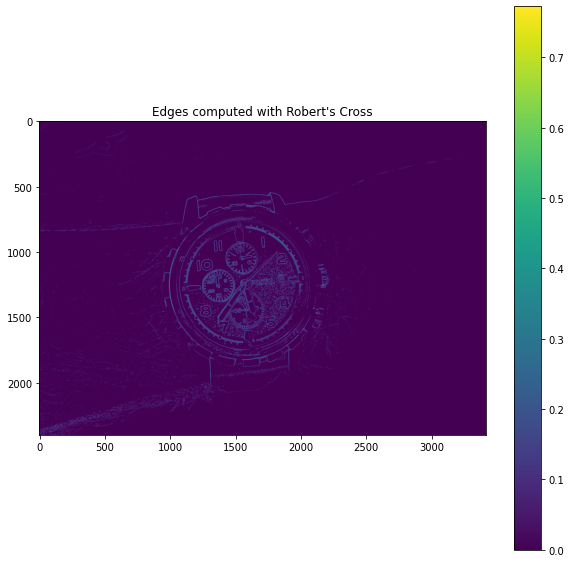

In [6]:
# My addition
# to reduce noise or the edges that are not significant we apply threshold and we make their color value to 0.
thresh = 0.09

edges_thresh = edges.copy()
edges_thresh[edges_thresh<thresh] = 0

#imshow(edges_thresh)
fig = figure(0, (10,10))
imshow(original, cmap = 'gray');
title("Original");



fig = figure(1, (10,10))
imshow(edges)
colorbar()
imshow(edges_thresh);
title("Edges computed with Robert's Cross");